#### Libraries

In [29]:
import numpy as np
from PIL import Image
from scipy import signal
import cv2
from google.colab.patches import cv2_imshow
from skimage.metrics import structural_similarity
import argparse
import imutils
import cv2
from math import log10, sqrt
import cv2#### Libraries#### Libraries
import numpy as np
import matplotlib.pyplot as plt

#### Functions

In [30]:
def pixel_wise_division(matrix_1, matrix_2):
    result = np.zeros(shape=(matrix_1.shape[0], matrix_1.shape[1])
    for i in range(matrix_1.shape[0]):
        for j in range(matrix_1.shape[1]):
          if (matrix_1[i][j] == 0) and (matrix_2[i][j] == 0):
              result[i][j] = 0;
          else:
              result[i][j] = matrix_1[i][j] / matrix_2[i][j]
  return result

In [31]:
def pixel_wise_multiplication(matrix_1, matrix_2):
  
  result = np.zeros(shape=(matrix_1.shape[0], matrix_1.shape[1]))
  for i in range(matrix_1.shape[0]):
    for j in range(matrix_1.shape[1]):
      result[i][j] = matrix_1[i][j] * matrix_2[i][j]

  return result

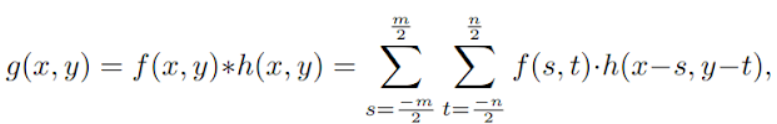

In [32]:
def convolution2D(input_img, kernel):
    convolved_img = np.zeros(shape=(input_img.shape[0], input_img.shape[1]))
    zeros_padd = int(len(kernel)/2)
    new_width = input_img.shape[0] + zeros_padd
    new_height = input_img.shape[1] + zeros_padd
    padded_img = cv2.copyMakeBorder(input_img, zeros_padd, zeros_padd, zeros_padd, zeros_padd, cv2.BORDER_CONSTANT,value=0)
    
    for i in range(input_img.shape[0]):
        for j in range(input_img.shape[1]):
            convolved_img[i][j] = np.sum(np.multiply(padded_img[i:i+len(kernel), j:j+len(kernel)], kernel))
    
    return convolved_img

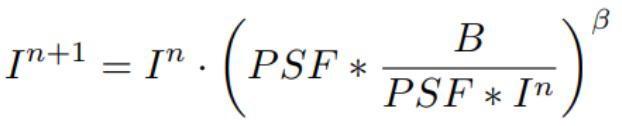

#### RL-Deconvolution

In [33]:
def RL_deconvolution(blurred_img, psf_kernel, n_iterations):

    #Flip PSF Kernel for second convolution (which is actually a correlation operation).
    psf_flip = psf_kernel.copy()
    for row in range(int(len(psf_kernel)/2)):
        for col in range(int(len(psf_kernel))):
                temp = psf_kernel[row][col]
                psf_flip[row][col] = psf_kernel[len(psf_kernel) - 1 - row][len(psf_kernel) - 1 - col]
                psf_flip[len(psf_kernel) - 1 - row][len(psf_kernel) - 1 - col] = temp

    restored_img = blurred_img.copy()

    #Start Iterations.
    for i in range(n_iterations):
        
        #print("ITERATION:", i)
        #First 2D-convolution:
        #convolution_1 = signal.convolve2d(restored_img, psf_kernel, boundary='symm', mode="same")
        convolution_1 = convolution2D(restored_img, psf_kernel)

        #Element-wise division:
        #temporal_result_div = blurred_img / convolution_1
        temporal_result_div = pixel_wise_division(blurred_img,convolution_1)

        #Second 2D-convolution:
        #convolution_2 = signal.convolve2d(temporal_result_div, psf_flip, boundary='symm', mode="same")
        convolution_2 = convolution2D(temporal_result_div, psf_flip)

        #Element-wise multiplication
        #restored_img = restored_img * convolution_2
        restored_img = pixel_wise_multiplication(restored_img,convolution_2)

    cv2_imshow(restored_img)

    return restored_img

#### Test

Ideal Image:


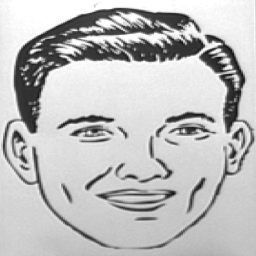

Blurred Image:


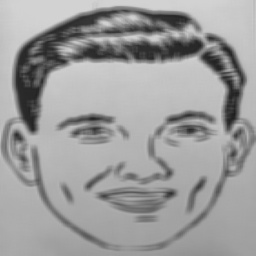

Deblurred Image:


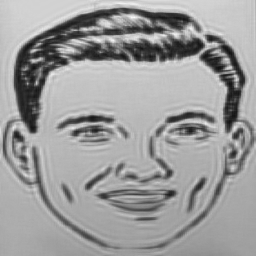

In [ ]:
n_iterations = 15
psf_kernel = [[0.09999997, 0.03656004, 0.02333187, 0.03656009, 0.1       ],
       [0.03656004, 0.00487692, 0.        , 0.0048772 , 0.03656009],
       [0.02333187, 0.        , 0.01718501, 0.        , 0.02333187],
       [0.03656009, 0.0048772 , 0.        , 0.00487692, 0.03656004],
       [0.1       , 0.03656009, 0.02333187, 0.03656004, 0.09999997]]

ideal_img = cv2.imread('ideal_face.jpg', 0)
canvas_size = (256, 256)
ideal_img = cv2.resize(ideal_img, canvas_size, interpolation = cv2.INTER_AREA)
print("Ideal Image:")
cv2_imshow(ideal_img)

print("Blurred Image:")
blurred_img = cv2.imread('blurred_face.jpg', 0)
blurred_img = cv2.resize(blurred_img, canvas_size, interpolation = cv2.INTER_AREA)
cv2_imshow(blurred_img)

print("Deblurred Image:")
deblurred_img = RL_deconvolution(blurred_img, psf_kernel, n_iterations)

Blurred Image:


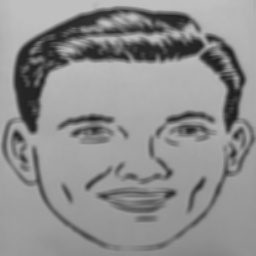

Deblurred Image:


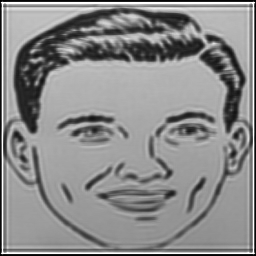

In [ ]:
n_iterations = 10
psf_kernel = [[0.04363306, 0.04279265, 0.0373583 , 0.04279268, 0.04363307],
       [0.02238792, 0.02251208, 0.02110372, 0.02251226, 0.02238794],
       [0.017958  , 0.01939033, 0.03307597, 0.01939033, 0.017958  ],
       [0.02238794, 0.02251226, 0.02110372, 0.02251208, 0.02238792],
       [0.04363307, 0.04279268, 0.0373583 , 0.04279265, 0.04363306]]

print("Blurred Image:")
blurred_img = cv2.imread('blurred_face_matlab.jpg', 0)
#blurred_img = cv2.resize(blurred_img, canvas_size, interpolation = cv2.INTER_AREA)
cv2_imshow(blurred_img)

print("Deblurred Image:")
deblurred_img = RL_deconvolution(blurred_img, psf_kernel, n_iterations)